In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd

coin = 'BTC'

path = 'E:/Funding_rate_Aave/'

# Load the uploaded CSV files
rates_data_path = path + 'Nasim/rates_data.csv'
dai_price_data_path = path + 'Nikan/prices/' + coin + 'USDT.csv'

# Read the CSV files into DataFrames
df_rates = pd.read_csv(rates_data_path)
df_dai_price = pd.read_csv(dai_price_data_path)

# Filter the rates data to only include rows for "DAI"
df_rates_dai = df_rates[df_rates['Symbol'] == coin]

# Calculate the rate changes (difference from previous row)
borrowrate_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg"]
df_rates_dai_change = df_rates_dai[borrowrate_columns].diff()

# Add the calculated changes to the rates DataFrame
df_rates_dai["liquidityRate_change"] = df_rates_dai_change["liquidityRate_avg"]
df_rates_dai["variableBorrowRate_change"] = df_rates_dai_change["variableBorrowRate_avg"]
df_rates_dai["utilizationRate_change"] = df_rates_dai_change["utilizationRate_avg"]
df_rates_dai["stableBorrowRate_change"] = df_rates_dai_change["stableBorrowRate_avg"]

# Calculate the return rate for the price data
df_dai_price["return_rate"] = df_dai_price["close"].pct_change(periods=6)

# Merge the rates and price data on timestamp
df_combined = pd.merge(df_rates_dai, df_dai_price, left_on="Timestamp", right_on="timestamp")

# Calculate the correlation between rate changes and return rate
rate_change_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                       "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
correlation = df_combined[["return_rate"] + rate_change_columns].dropna()
correlation = correlation.corr()


In [13]:
correlation['return_rate']['return_rate']

nan

In [14]:
unique_symbols = df_rates['Symbol'].unique()
unique_symbols

array(['DAI', 'TUSD', 'USDC', 'USDT', 'SUSD', 'BAT', 'LINK', 'KNC', 'MKR',
       'MANA', 'ZRX', 'SNX', 'WBTC', 'BUSD', 'ENJ', 'REN', 'YFI', 'AAVE',
       'UNI', 'AUSDT', 'AWBTC', 'AWETH', 'AYFI', 'AZRX', 'AUNI', 'AAAVE',
       'ABAT', 'ABUSD', 'ADAI', 'AENJ', 'AKNC', 'ALINK', 'AMANA', 'AMKR',
       'AREN', 'ASNX', 'ASUSD', 'ATUSD', 'AUSDC', 'ACRV', 'AGUSD', 'ABAL',
       'AXSUSHI', 'ARENFIL', 'ARAI', 'AAMPL', 'AUSDP', 'ADPI', 'AFRAX',
       'AFEI', 'ASTETH', 'AENS', 'AUST', 'ACVX', 'A1INCH', 'ALUSD',
       'AAMMWETH', 'AAMMDAI', 'AAMMUSDC', 'AAMMUSDT', 'AAMMWBTC', 'WETH',
       'LUSD', 'CRV', 'BAL', 'ENS', '1INCH', 'FRAX'], dtype=object)

In [15]:
len(unique_symbols)

68

In [16]:
import pandas as pd
import numpy as np

def cal_corr(coin):
    path = 'E:/Funding_rate_Aave/'

    # Load the uploaded CSV files
    rates_data_path = path + 'Nasim/rates_data.csv'
    dai_price_data_path = path + 'Nikan/prices/' + coin + 'USDT.csv'

    try:
        # Read the CSV files into DataFrames
        df_rates = pd.read_csv(rates_data_path)
        df_dai_price = pd.read_csv(dai_price_data_path)
    except FileNotFoundError:
        # Return a DataFrame with NaN values if the file is not found
        rate_change_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                            "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
        return_rate_column = ["return_rate"]
        all_columns = return_rate_column + rate_change_columns
        return pd.DataFrame(np.nan, index=[0], columns=all_columns).corr()

    # Filter the rates data to only include rows for "DAI"
    df_rates_dai = df_rates[df_rates['Symbol'] == coin]

    # Calculate the rate changes (difference from previous row)
    borrowrate_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg"]
    df_rates_dai_change = df_rates_dai[borrowrate_columns].diff()

    # Add the calculated changes to the rates DataFrame
    df_rates_dai["liquidityRate_change"] = df_rates_dai_change["liquidityRate_avg"]
    df_rates_dai["variableBorrowRate_change"] = df_rates_dai_change["variableBorrowRate_avg"]
    df_rates_dai["utilizationRate_change"] = df_rates_dai_change["utilizationRate_avg"]
    df_rates_dai["stableBorrowRate_change"] = df_rates_dai_change["stableBorrowRate_avg"]

    # Calculate the return rate for the price data
    df_dai_price["return_rate"] = df_dai_price["close"].pct_change(periods=6)

    # Merge the rates and price data on timestamp
    df_combined = pd.merge(df_rates_dai, df_dai_price, left_on="Timestamp", right_on="timestamp")

    # Calculate the correlation between rate changes and return rate
    rate_change_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                        "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
    correlation = df_combined[["return_rate"] + rate_change_columns].dropna()
    correlation = correlation.corr()
    
    return correlation

In [17]:
import numpy as np
np.size(cal_corr('BTC'))

81

In [18]:
corr_result = np.zeros((len(unique_symbols),9,9))
np.size(corr_result)

5508

In [8]:
for i in range(0,len(unique_symbols)):
    corr_result[i] = cal_corr(unique_symbols[i])

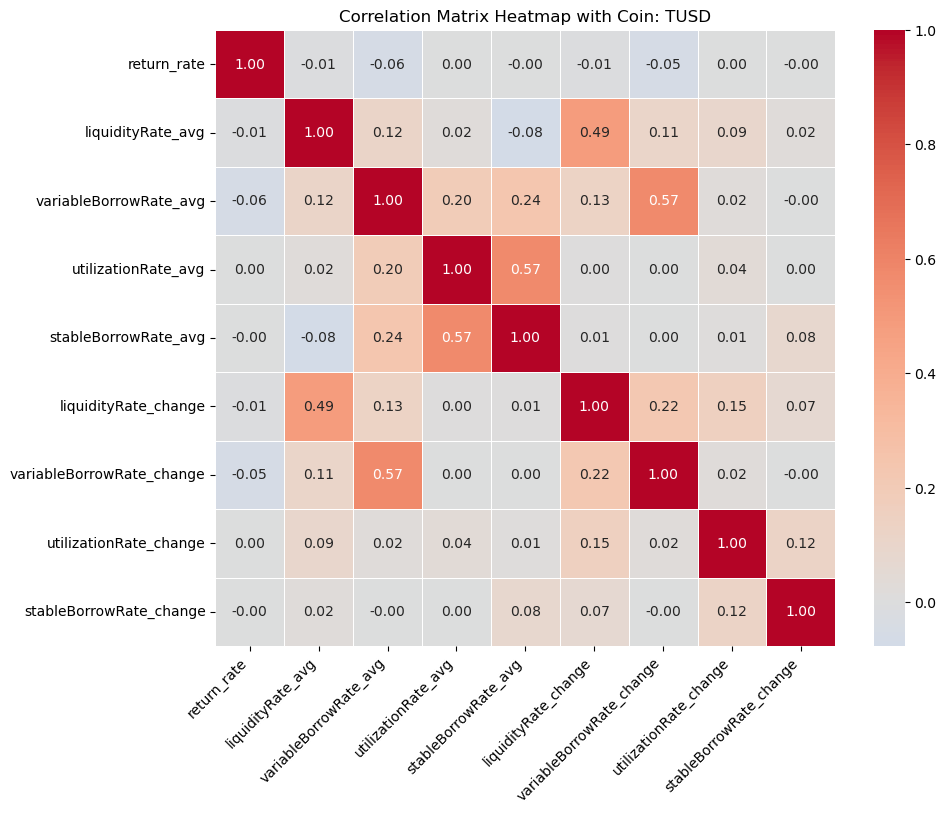

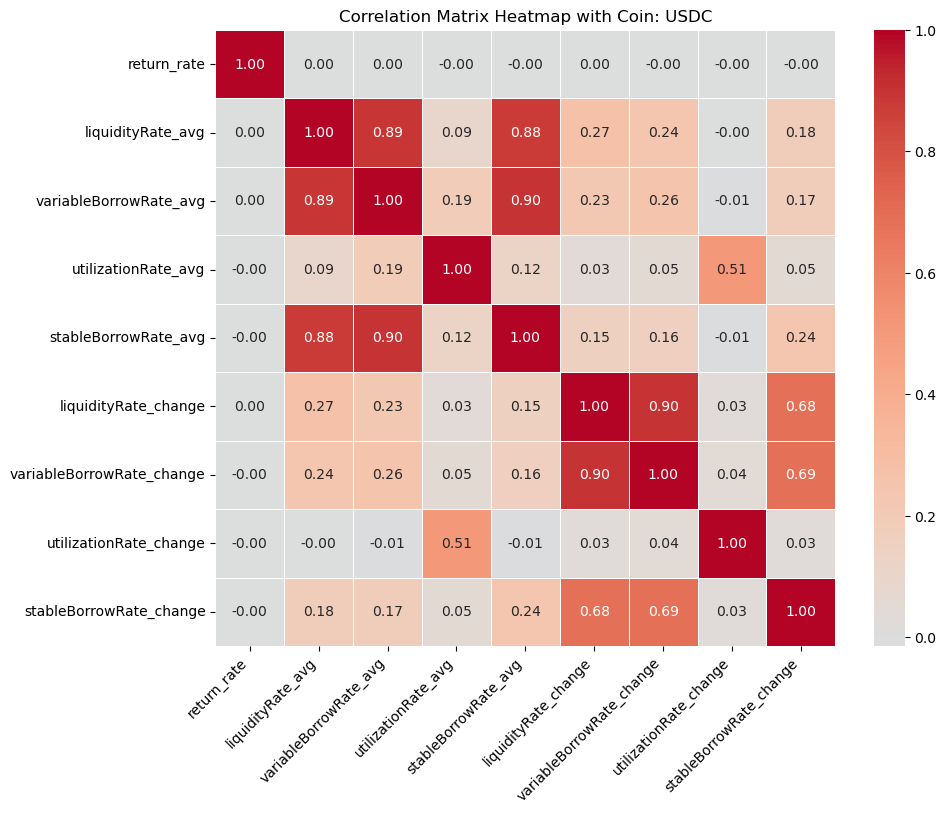

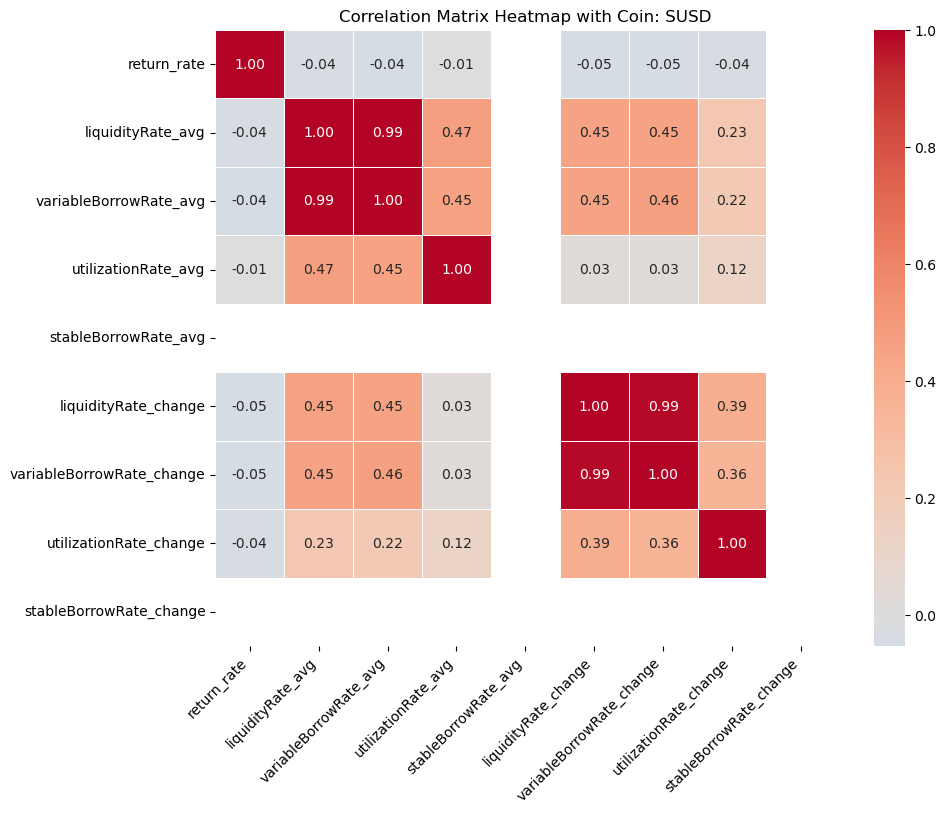

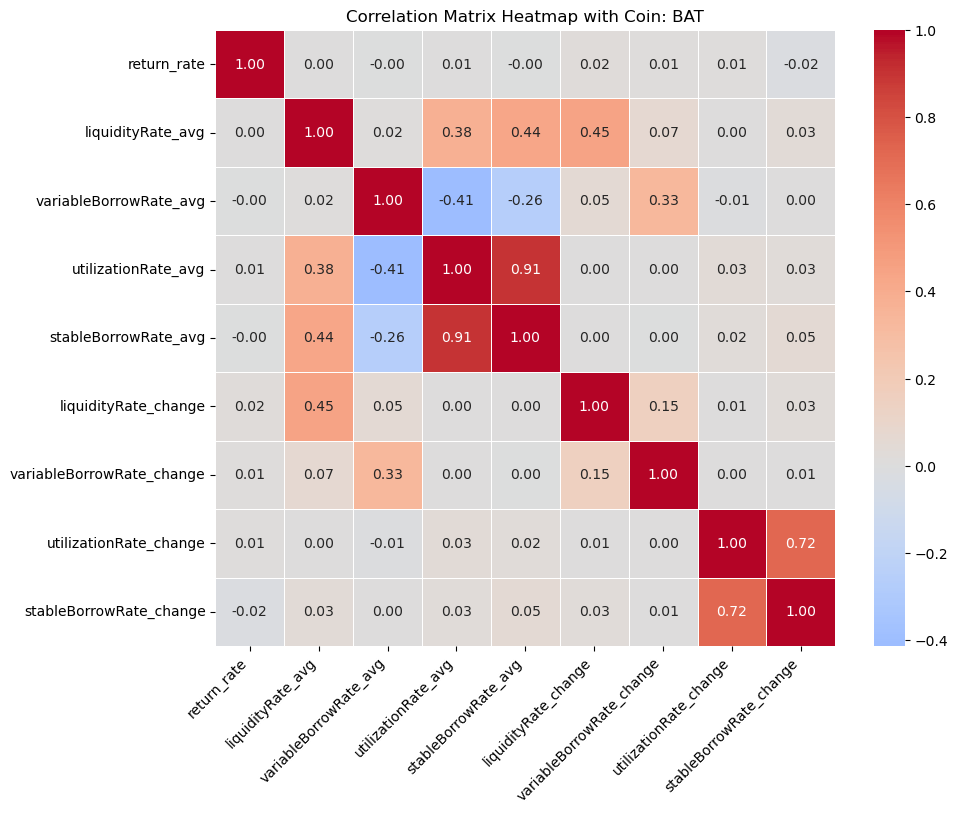

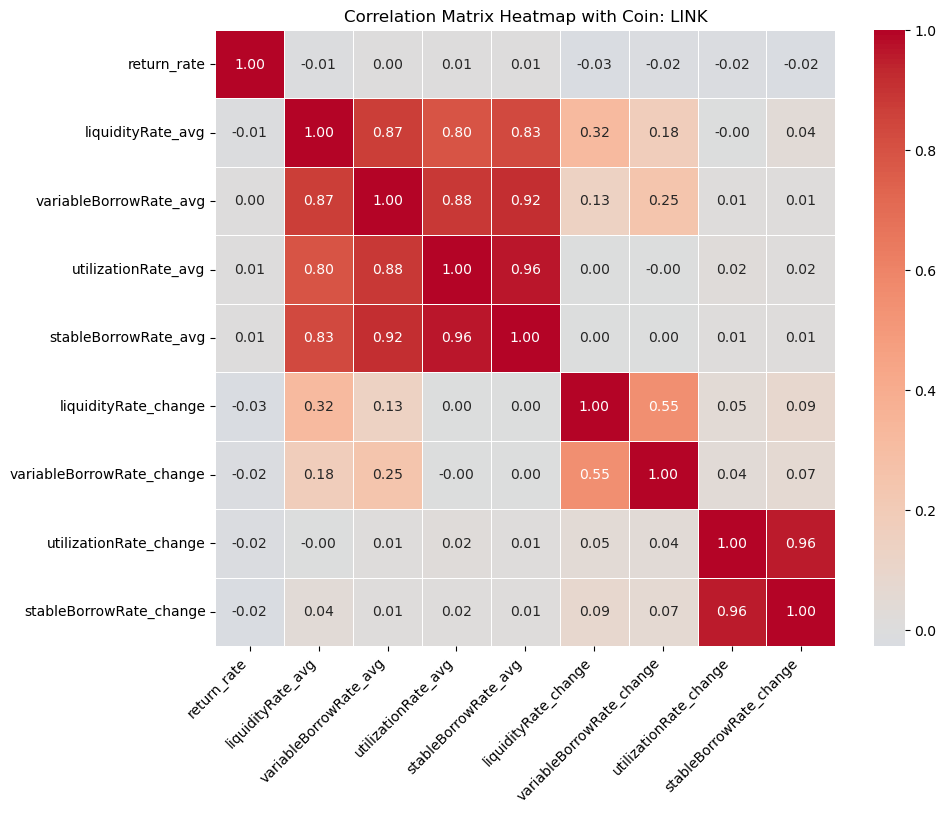

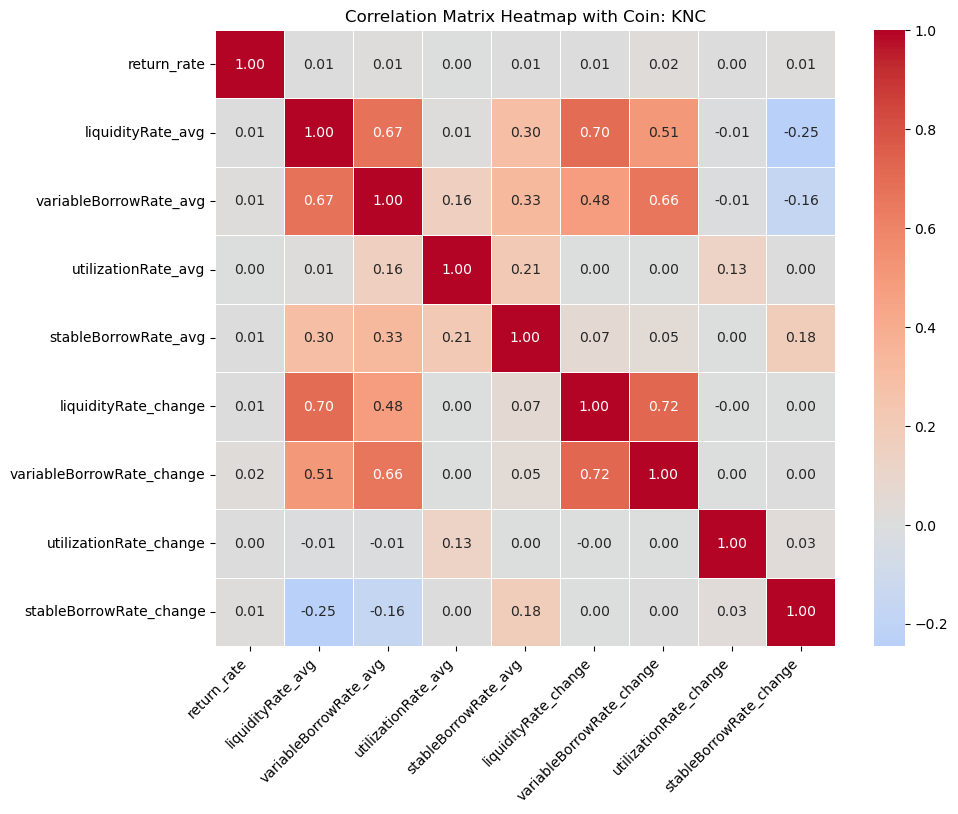

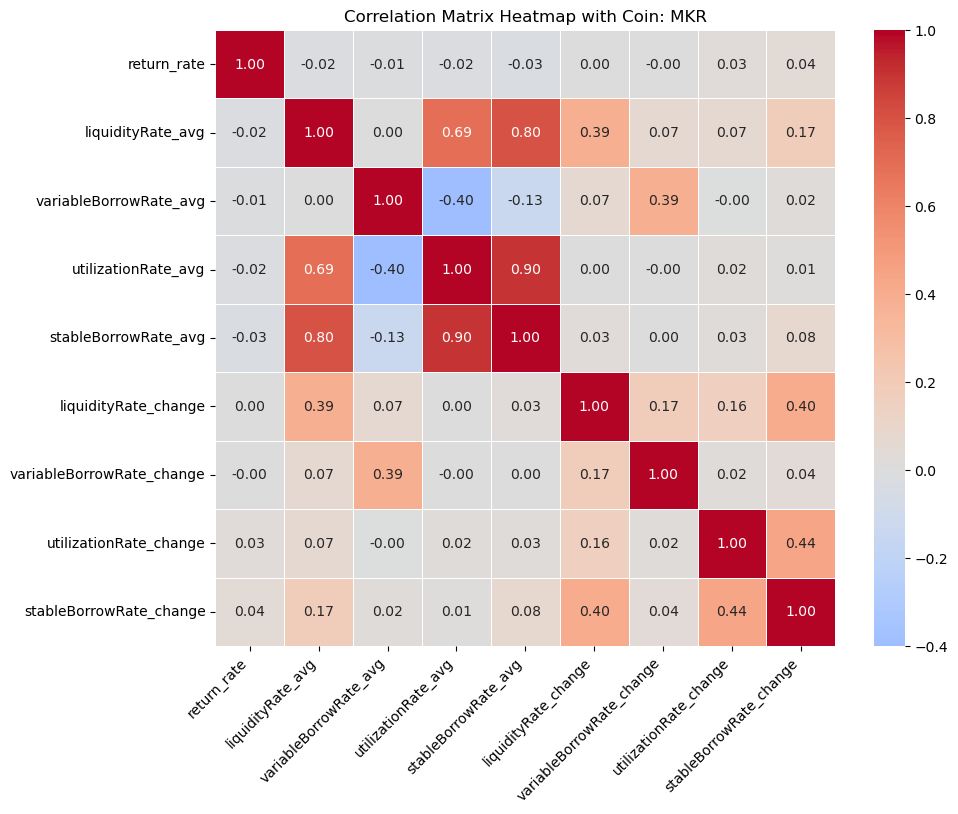

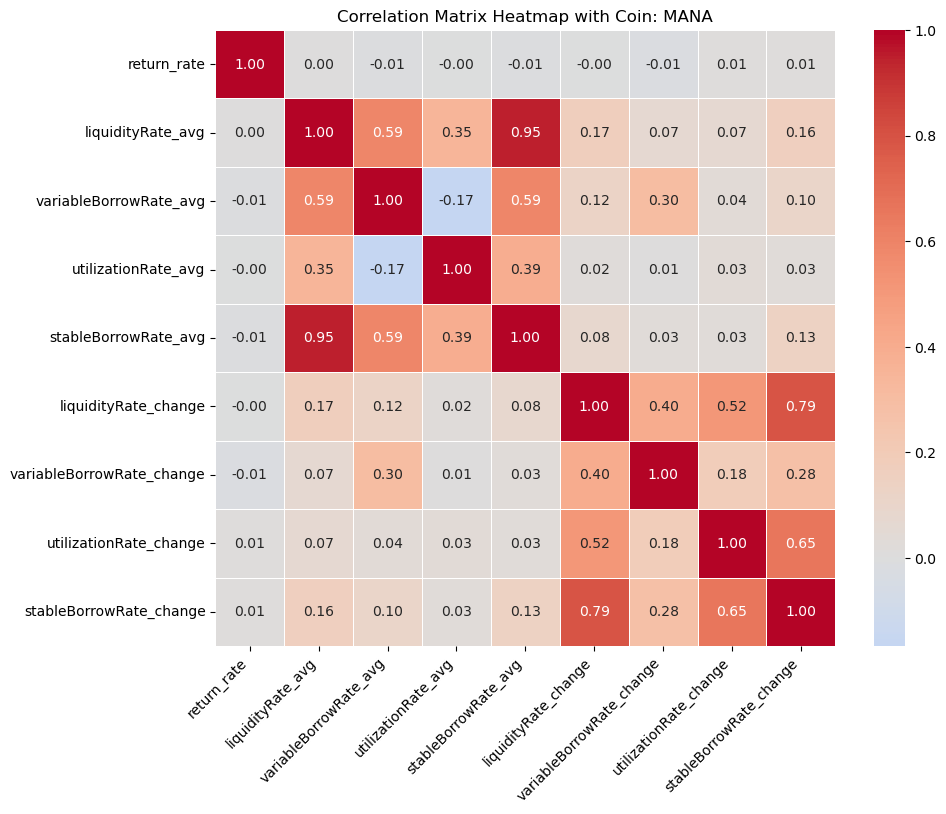

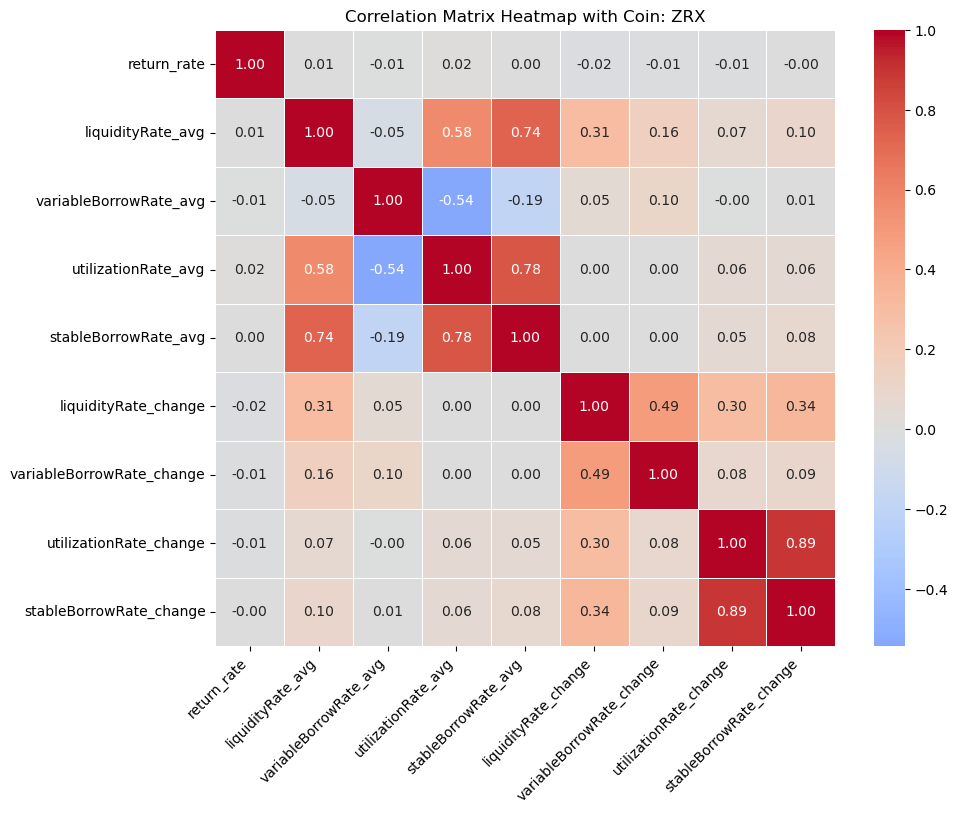

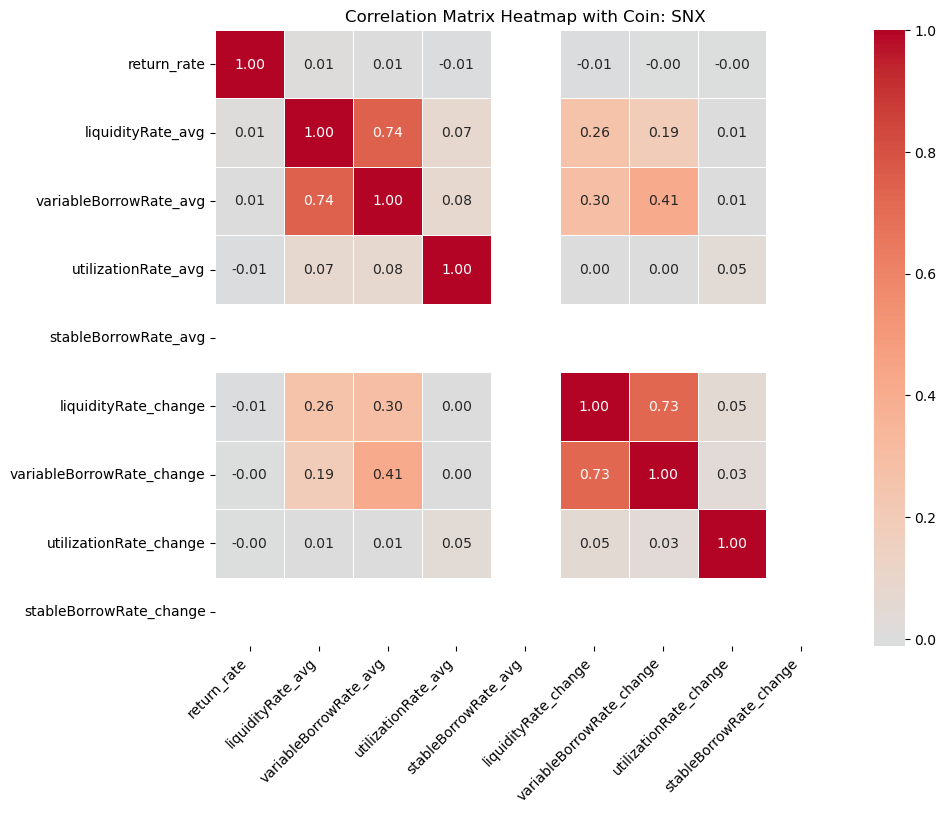

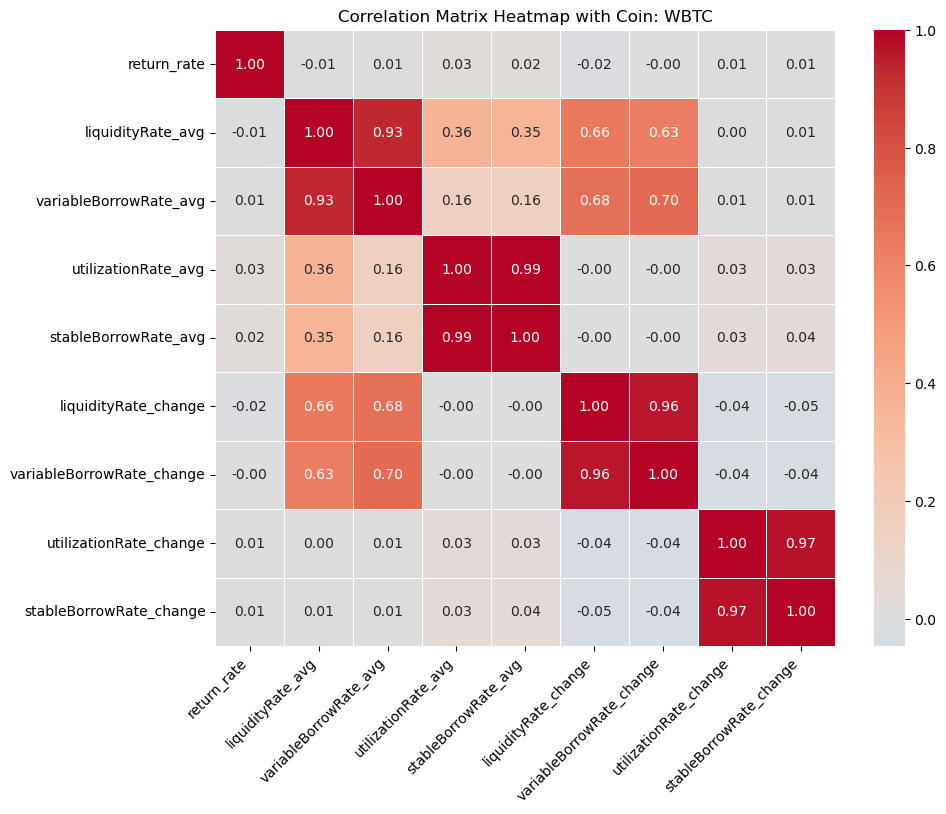

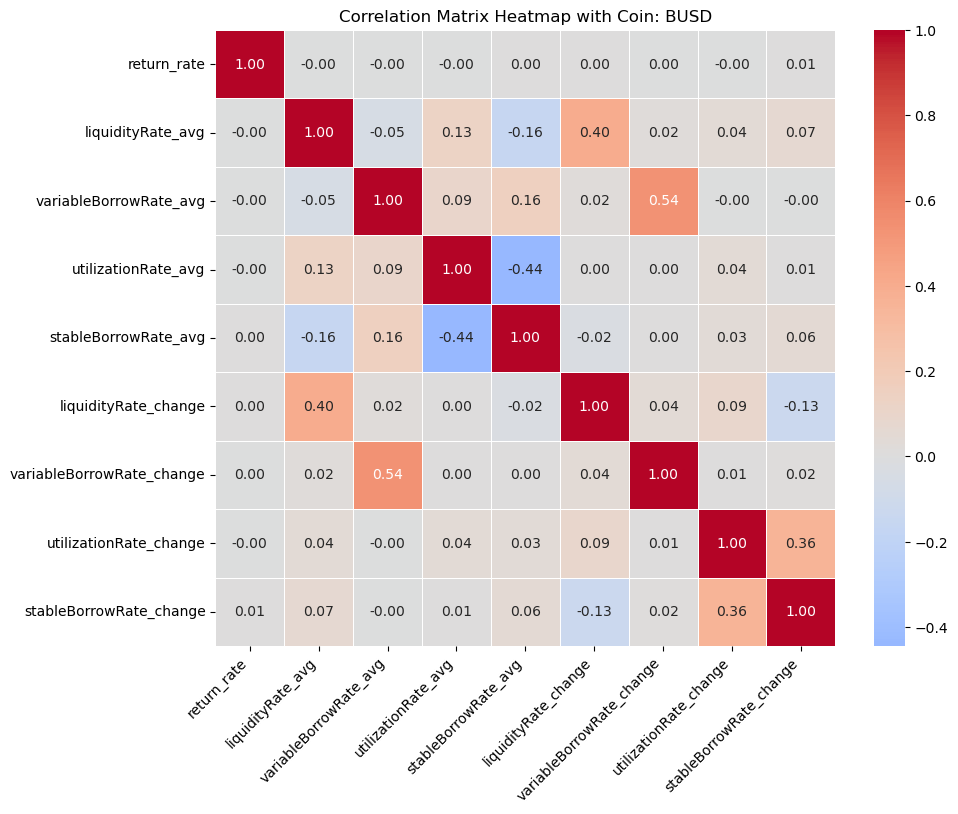

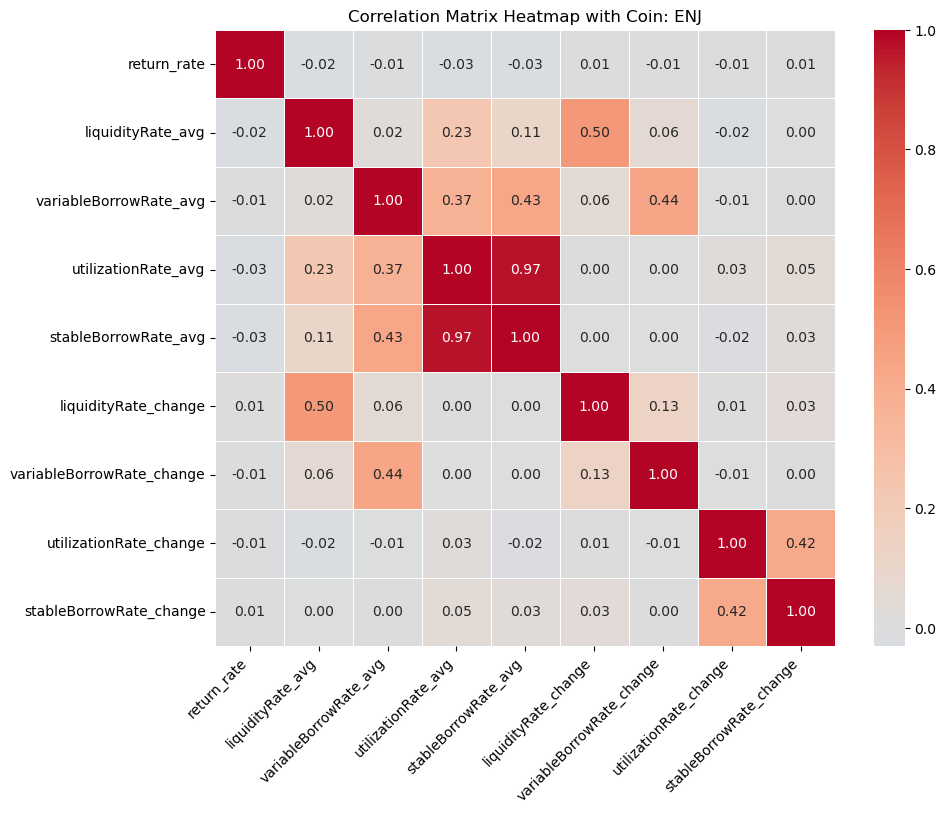

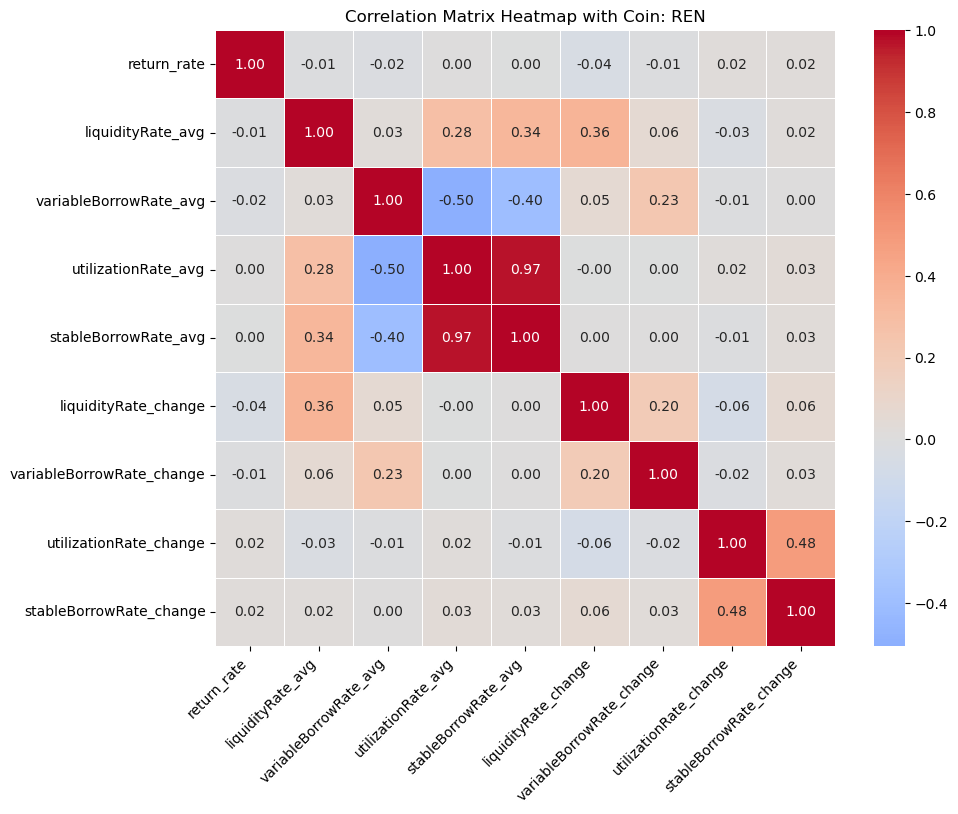

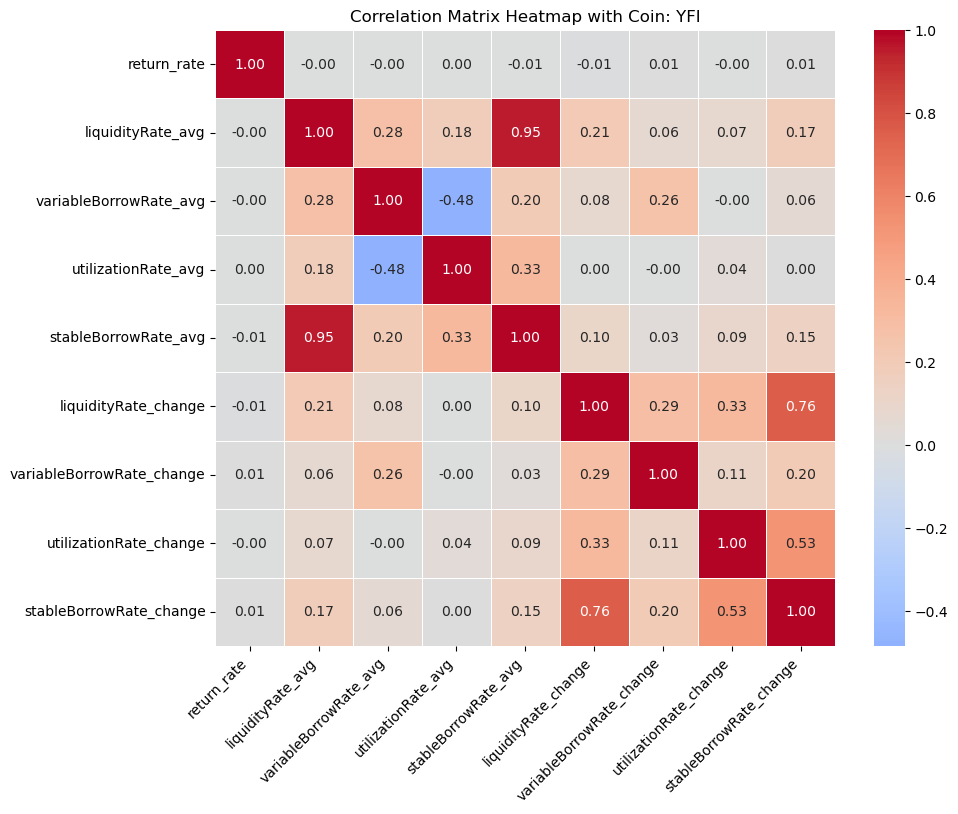

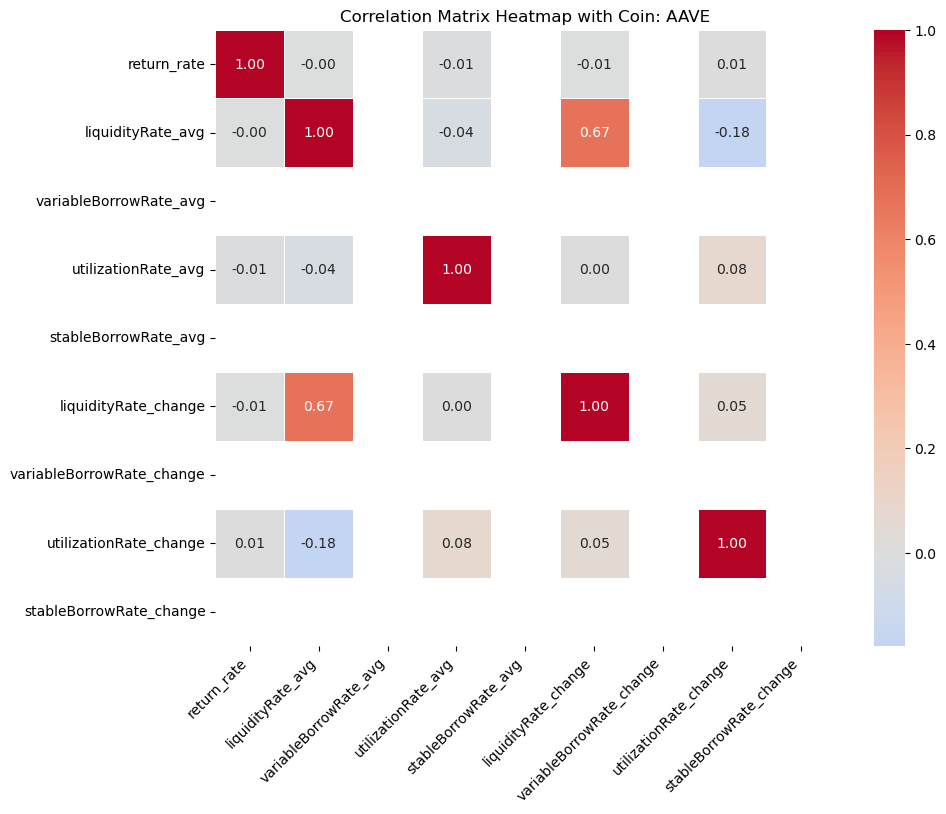

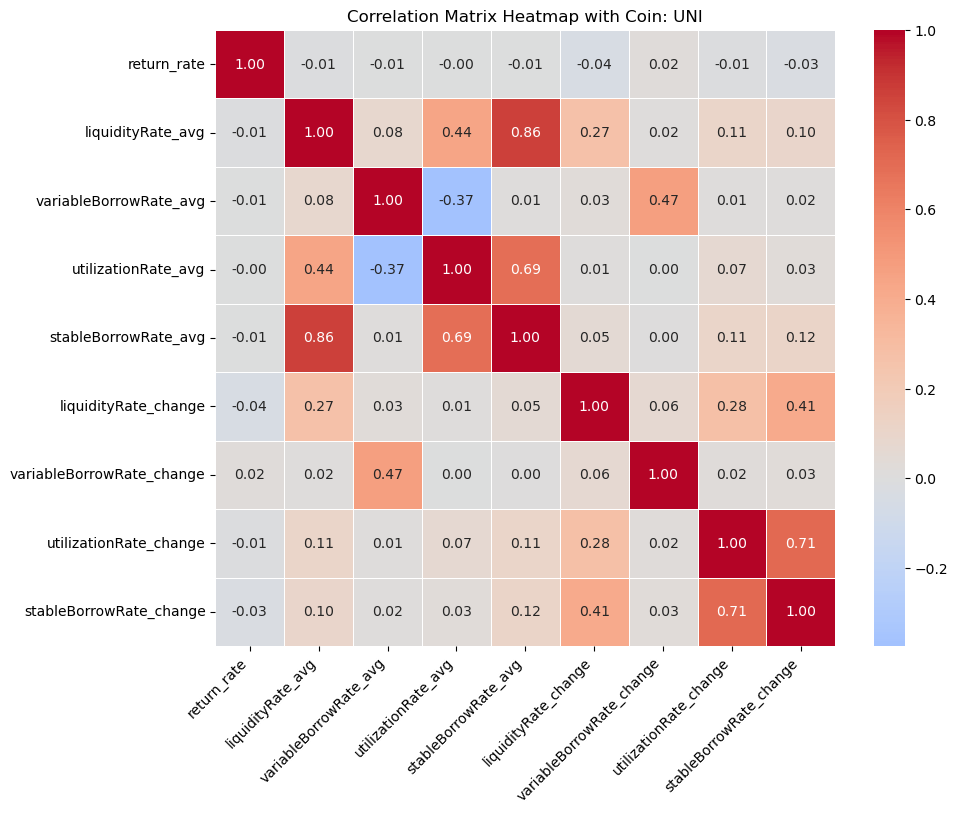

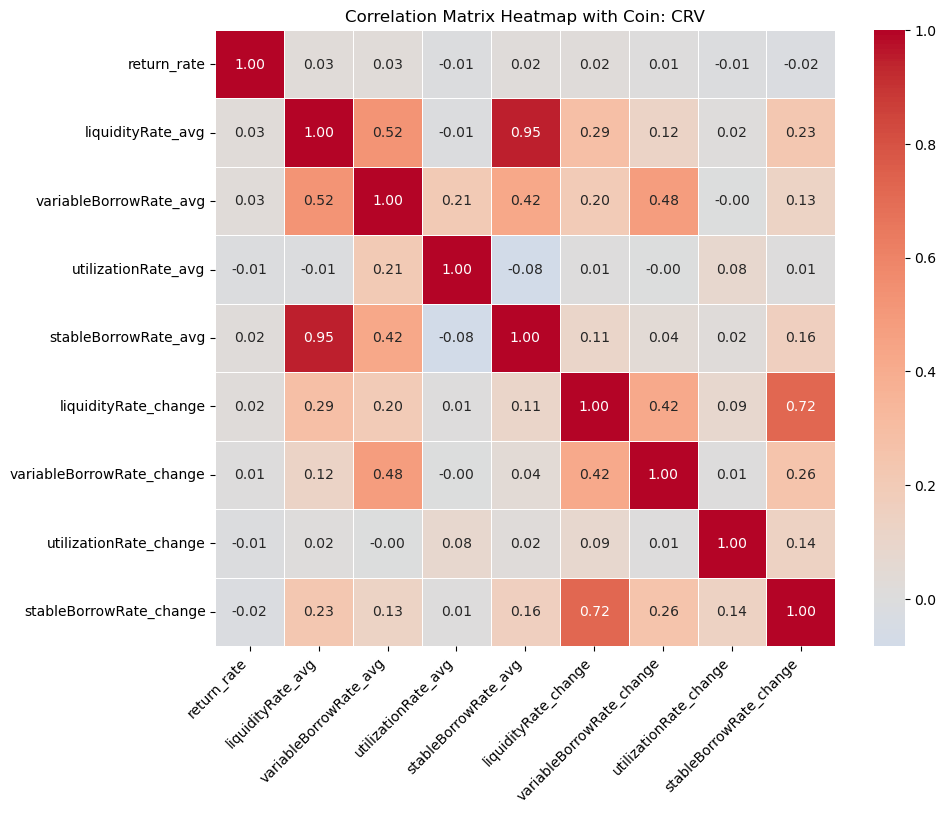

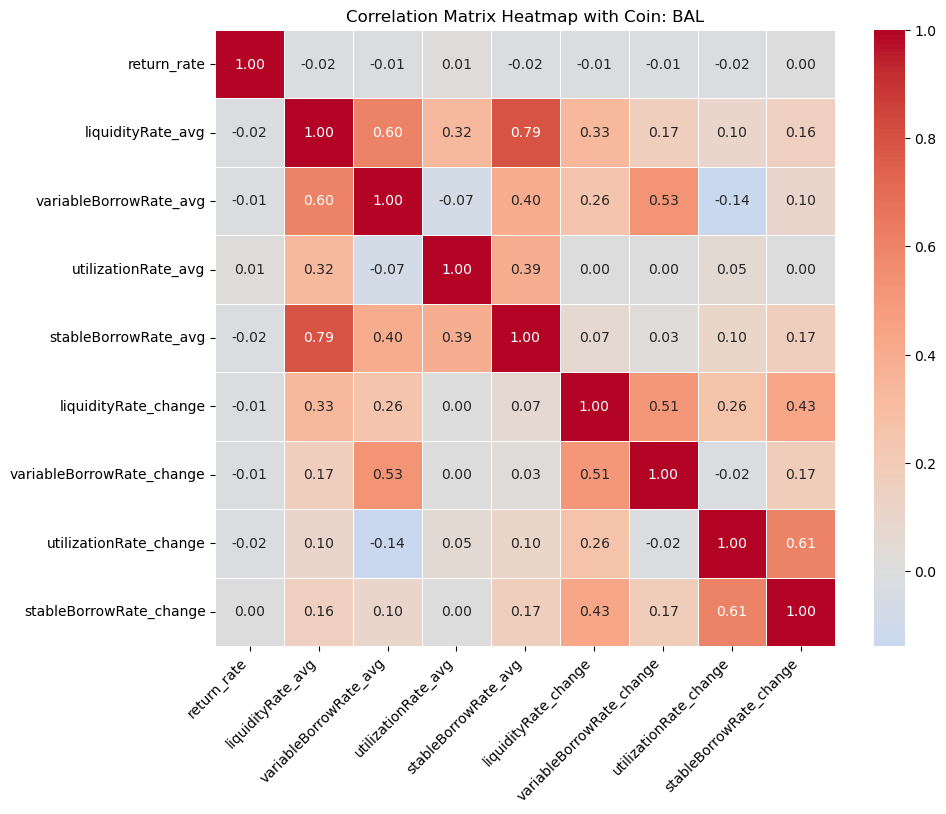

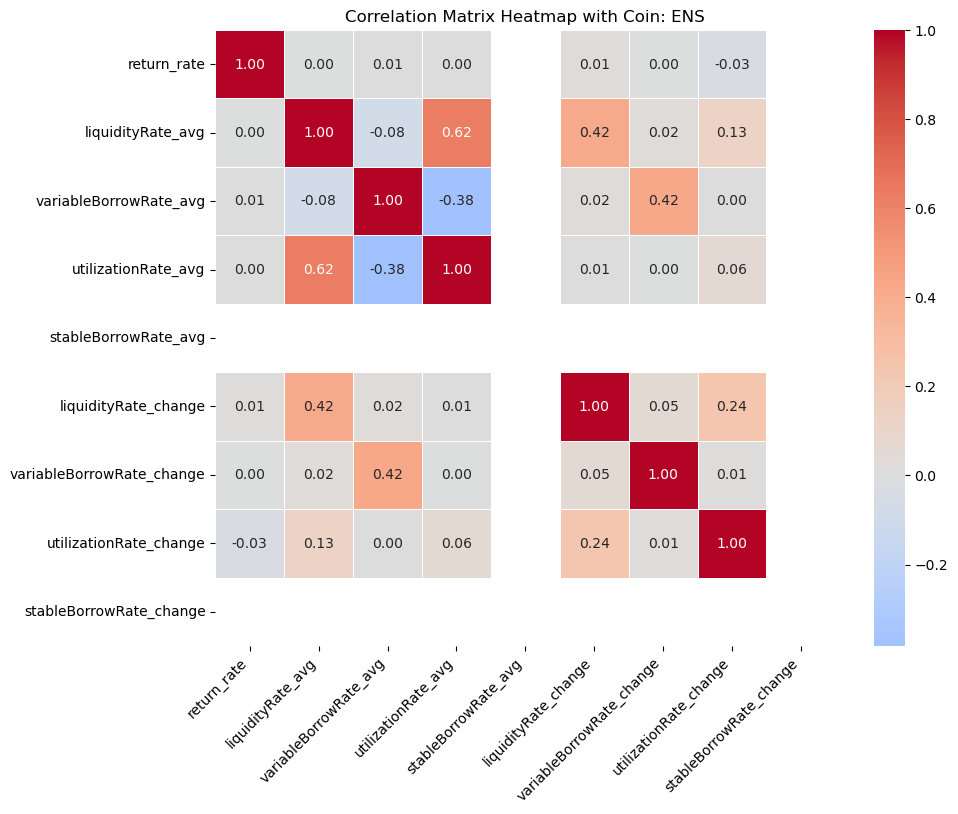

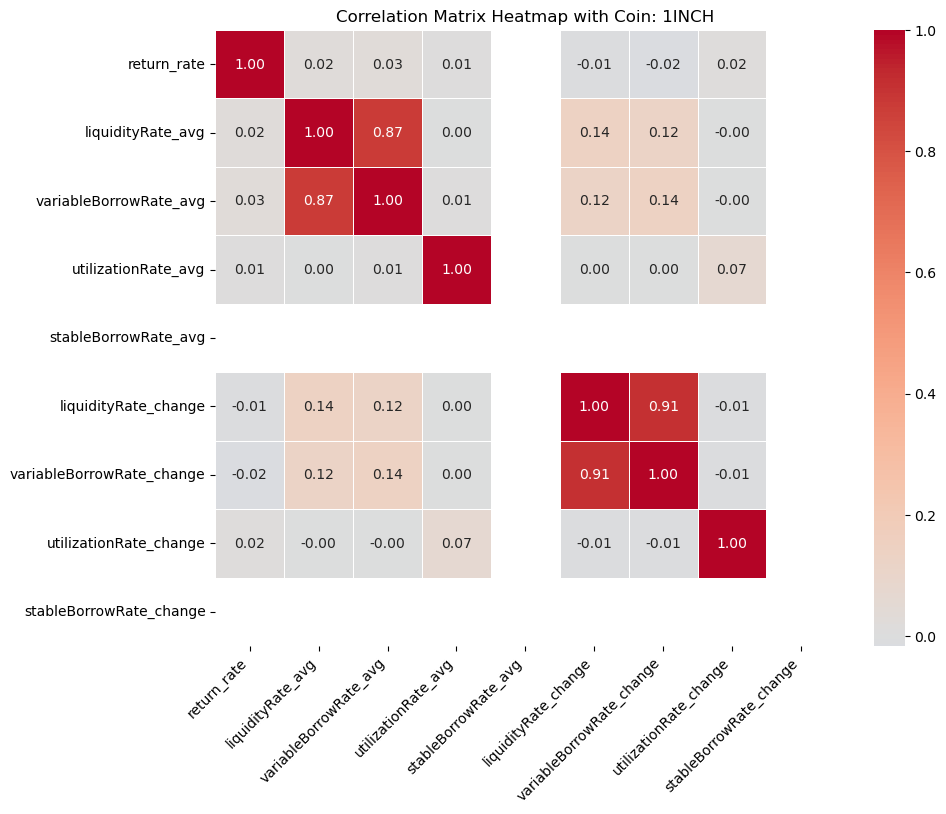

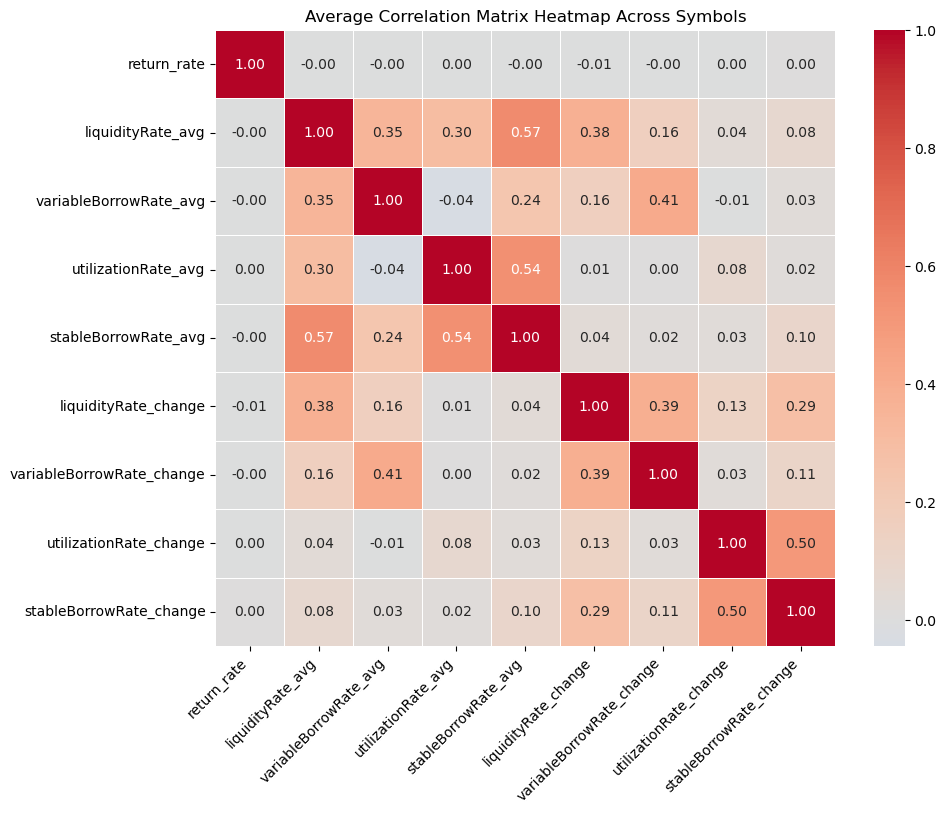

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cumulative_data = correlation.fillna(0)
valid_data_count = 0

for i in range(0, len(unique_symbols)):
    data = cal_corr(unique_symbols[i])
    if not data.isna().any().any():
        cumulative_data += data  # 累加每次的 9x9 DataFrame
        valid_data_count += 1    # 记录有效数据的次数
    if pd.notna(data['return_rate']['return_rate']):
        plt.figure(figsize=(10, 8))

        # Create a heatmap using seaborn to visualize the correlation matrix
        sns.heatmap(data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

        # Add title and labels
        plt.title('Correlation Matrix Heatmap with Coin: ' + unique_symbols[i])
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.yticks(rotation=0)  # Keep y-axis labels horizontal
        
        plt.show()
        

# 检查是否有有效数据
if valid_data_count > 0:
    # 计算 data 的平均值
    average_data = cumulative_data / valid_data_count

    # 显示平均 heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

    # 添加标题和标签
    plt.title('Average Correlation Matrix Heatmap Across Symbols')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.show()